In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv(r"C:\Users\Hp Elitebook\3D Objects\medical_students_dataset.csv")

In [3]:
data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [4]:
data.drop("Student ID", axis=1, inplace =True)
data.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [5]:
data.mean()

C:\Users\Hp Elitebook\AppData\Local\Temp\ipykernel_15108\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Age                26.021561
Height            174.947103
Weight             69.971585
BMI                23.338869
Temperature        98.600948
Heart Rate         79.503767
Blood Pressure    114.558033
Cholesterol       184.486361
dtype: float64

In [6]:
#Filling the missing numeric values with the mean
df = data.fillna(data.mean())

C:\Users\Hp Elitebook\AppData\Local\Temp\ipykernel_15108\1622740008.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = data.fillna(data.mean())


In [7]:
df.describe(include=object)

,Gender,Blood Type,Diabetes,Smoking
count,180000,180000,180000,180000
unique,2,4,2,2
top,Male,B,No,No
freq,90005,45537,161986,143971


In [8]:
#Filling the non-numeric column missing values with the most frequent value
df['Gender'] = df['Gender'].fillna('Male')
df['Blood Type'] = df['Blood Type'].fillna('B')
df['Diabetes'] = df['Diabetes'].fillna('No')
df['Smoking'] = df['Smoking'].fillna('No')

In [9]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No


In [10]:
df.isnull().sum()

Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

<Axes: >

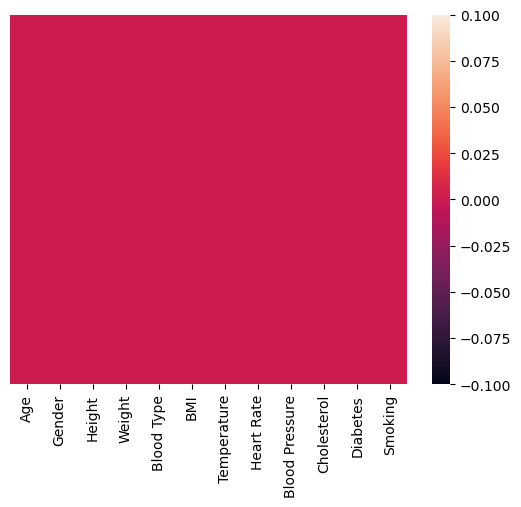

In [11]:
#Visualization of data cleanliness using seaborn heatmap
sns.heatmap(df.isnull(),yticklabels=False)

In [12]:
#Data Visualization

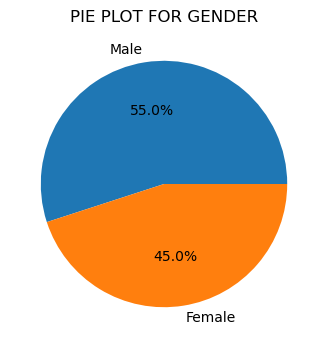

In [13]:
#pieplot for Gender
plt.figure(figsize=(5,4))
count= df['Gender'].value_counts()
plt.pie(count, labels=count.index, autopct="%1.1f%%")
plt.title('PIE PLOT FOR GENDER')
plt.xticks(rotation=90)
plt.show()

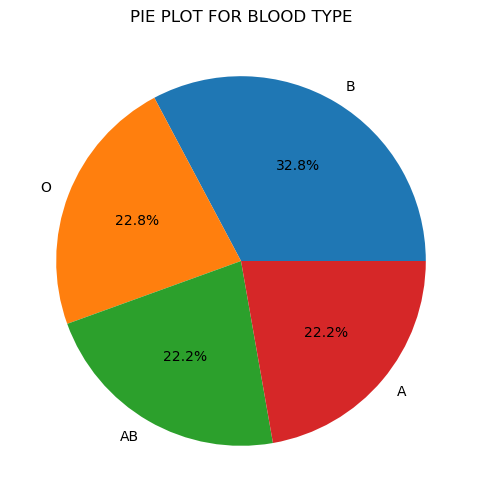

In [14]:
#pie plot for bloodtype
plt.figure(figsize=(8,6))
count = df['Blood Type'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('PIE PLOT FOR BLOOD TYPE')
plt.xticks(rotation=90)
plt.show()

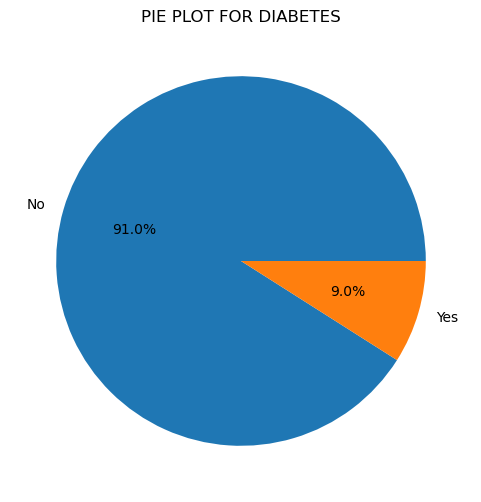

In [15]:
#Pieplot for diabetes 
plt.figure(figsize=(6,6))
count=df['Diabetes'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('PIE PLOT FOR DIABETES')
plt.xticks(rotation=90)
plt.show()

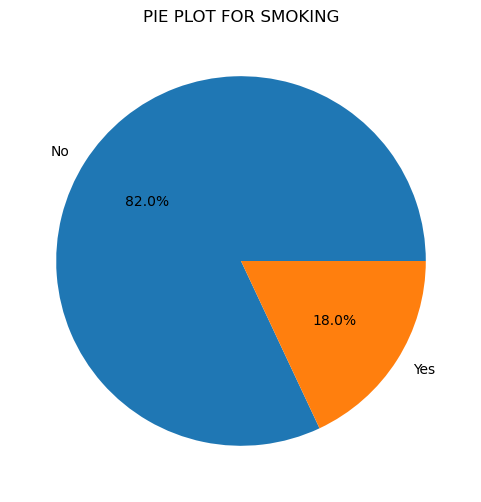

In [16]:
#Pie plot for smoking
plt.figure(figsize=(6,6))
count=df['Smoking'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('PIE PLOT FOR SMOKING')
plt.xticks(rotation=90)
plt.show()

In [17]:
grouped = df.groupby(['Gender'])['Blood Type'].value_counts()
grouped

Gender  Blood Type
Female  B             29501
        O             20689
        A             19969
        AB            19836
Male    B             36036
        O             24822
        AB            24650
        A             24497
Name: Blood Type, dtype: int64

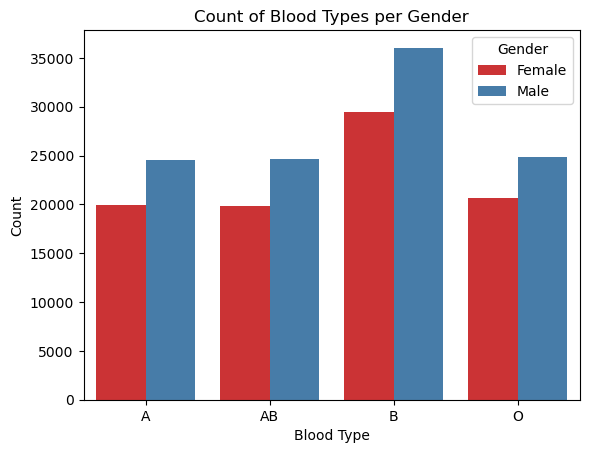

In [18]:
grouped = df.groupby(['Gender', 'Blood Type']).size().reset_index(name='Count')

sns.set_palette('Set1')
sns.barplot(x='Blood Type', y='Count', hue='Gender', data=grouped)

plt.title('Count of Blood Types per Gender')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


In [19]:
#Sex and diabetes
grouped2= df.groupby(['Gender'])['Diabetes'].value_counts()
grouped2

Gender  Diabetes
Female  No           81983
        Yes           8012
Male    No          100003
        Yes          10002
Name: Diabetes, dtype: int64

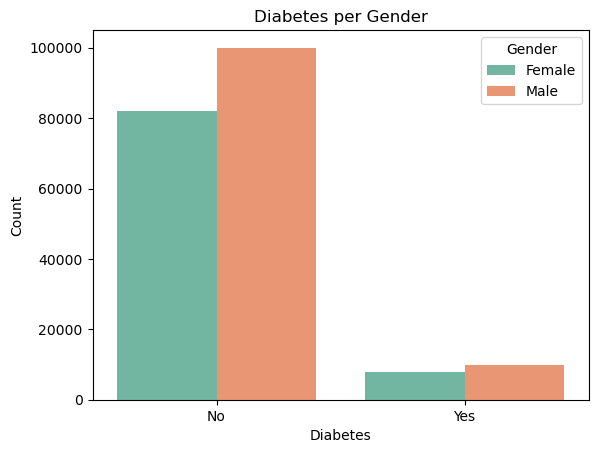

In [20]:
grouped2 = df.groupby(['Gender', 'Diabetes']).size().reset_index(name='Count')
sns.set_palette('Set2')
sns.barplot(x='Diabetes', y='Count', hue='Gender', data=grouped2)
plt.title('Diabetes per Gender')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [21]:
#Gender and smoking
grouped3 = df.groupby(['Gender'])['Smoking'].value_counts()
grouped3

Gender  Smoking
Female  No         73900
        Yes        16095
Male    No         90071
        Yes        19934
Name: Smoking, dtype: int64

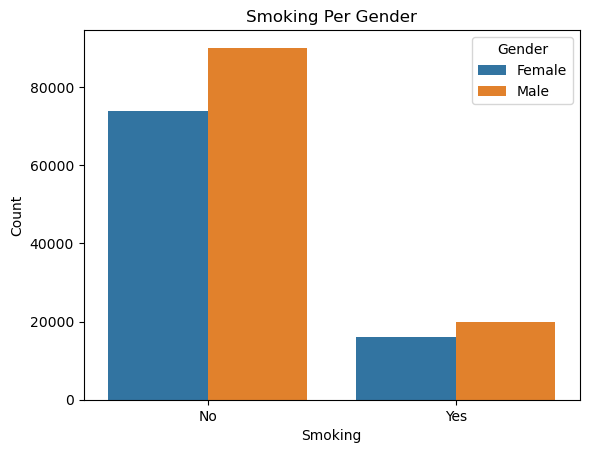

In [22]:
#Plot of Gender and smoking
grouped3 = df.groupby(['Gender','Smoking']).size().reset_index(name='Count')
sns.set_palette('tab10')
sns.barplot(x='Smoking', y='Count', hue='Gender', data=grouped3)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Smoking Per Gender')
plt.legend(title='Gender')
plt.show()

C:\Users\Hp Elitebook\AppData\Local\Temp\ipykernel_15108\3548436647.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

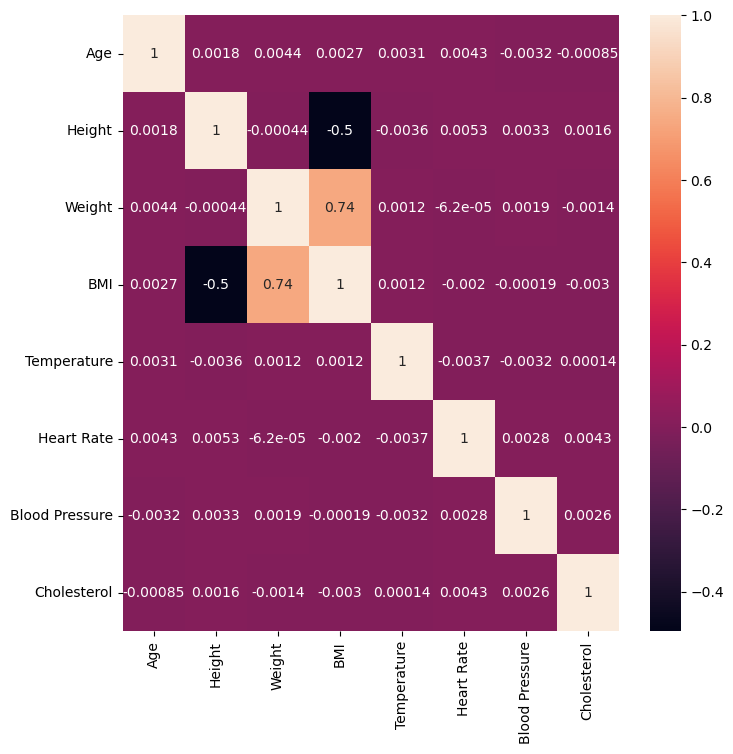

In [23]:
#correlation between variables
fig,ax = plt.subplots(figsize= (8,8))
sns.heatmap(df.corr(), annot=True)

In [24]:
#changing Gender column to boolean type
df['Diabetes'] = df['Diabetes'].map ( {'Yes':0,'No':1} ).astype(int)

In [25]:
#changing the Gender column as a boolean
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype(int)

In [26]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.000000,0,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,1,No
1,26.021561,1,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,1,No
2,32.000000,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,0,No
3,30.000000,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,1,Yes
4,23.000000,0,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,1,No


contingency Table:
BMI       10.074837  10.081431  10.090131  10.102079  10.112721  10.126413  \
Diabetes                                                                     
0                 0          0          0          0          0          0   
1                 2          2          2          2          2          2   

BMI       10.126734  10.136255  10.136773  10.139365  ...  44.051476  \
Diabetes                                              ...              
0                 0          0          0          0  ...          0   
1                 1          2          2          2  ...          2   

BMI       44.074195  44.076862  44.090936  44.157547  44.175387  44.194021  \
Diabetes                                                                     
0                 0          2          0          0          1          2   
1                 2          0          2          2          0          0   

BMI       44.288003  44.314074  44.355113  
Diabetes              

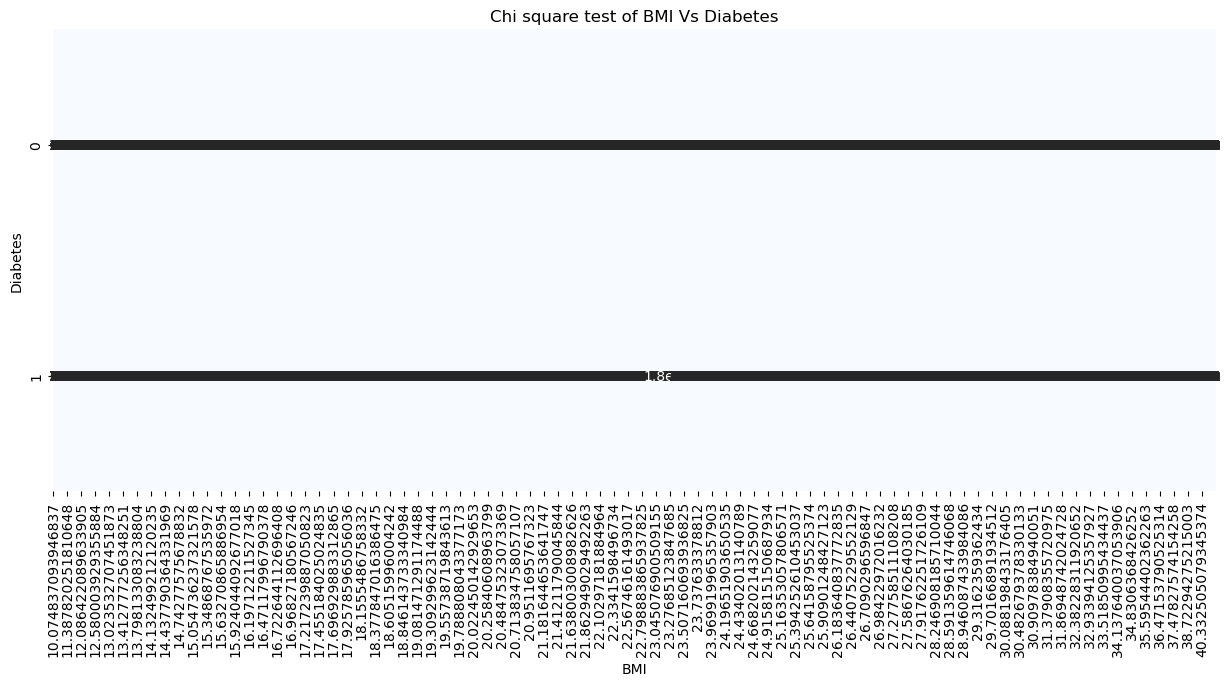

In [33]:
#Chi square test to determine relationship between BMI and Diabetes
import scipy.stats as stats
#create a contigency table
contingency_table = pd.crosstab(df['Diabetes'],df['BMI'])
#perform chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
#print the contigency table
print("contingency Table:")
print(contingency_table)

#print the chi-square test results
print("\nChi-square Test of Independence:")
print(f"Chi-square value:{chi2:.3f}")
print(f"P-value:{p:3f}")
print(f"Degrees of freedom:{dof}")

#plotting the contigency table
plt.subplots(figsize=(15,6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', cbar=False)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Chi square test of BMI Vs Diabetes')
plt.show()


contingency Table:
Gender        0       1
Diabetes               
0          8012   10002
1         81983  100003

Chi-square Test of Independence:
Chi-square value:2.148
P-value: 0.142755
Degrees of freedom:1


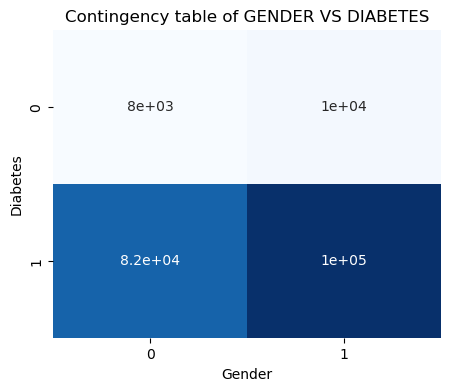

In [34]:
#Relationship between Gender and Diabetes
import scipy.stats as stats
#contingency table
contingency_table=pd.crosstab(df['Diabetes'], df['Gender'])
#chi-square test 
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
#print contingency table
print('contingency Table:')
print(contingency_table)
#Print the chi-square test results
print("\nChi-square Test of Independence:")
print(f"Chi-square value:{chi2:.3f}")
print(f"P-value: {p:3f}")
print(f"Degrees of freedom:{dof}")
#plotting of contigency chi square test table
plt.subplots(figsize=(5,4))
sns.heatmap(contingency_table, annot=True, cmap ='Blues', cbar=False)
plt.xlabel('Gender')
plt.ylabel('Diabetes')
plt.title('Contingency table of GENDER VS DIABETES')
plt.show()

contingency_Table:
Smoking       No    Yes
Diabetes               
0          14778   3236
1         149193  32793
nChi-square Test of Independence:
Chi-square value:2.148
P-value:0.860735
Degrees of freedom:1


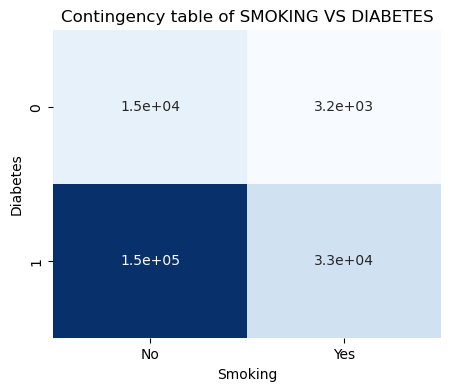

In [37]:
#relationship between smoking and Diabetes
import scipy.stats as stats
#contingencytable
contingency_table = pd.crosstab(df['Diabetes'], df['Smoking'])
#Chi-square test
Chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
#print contingency tabe
print('contingency_Table:')
print(contingency_table)
#print chi-square test results
print("nChi-square Test of Independence:")
print(f"Chi-square value:{chi2:.3f}")
print(f"P-value:{p:3f}")
print(f"Degrees of freedom:{dof}")

#plotting of the contigency table
plt.subplots(figsize=(5,4))
sns.heatmap(contingency_table, annot=True, cmap ='Blues', cbar=False)
plt.xlabel('Smoking')
plt.ylabel('Diabetes')
plt.title('Contingency table of SMOKING VS DIABETES')
plt.show()

In [38]:
#Relationship between Smoking and blood pressure
import scipy.stats as stats
#contingencytable
contingency_table = pd.crosstab(df['Blood Pressure'], df['Smoking'])
#Chi-square test
Chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
#print contingency tabe
print('contingency_Table:')
print(contingency_table)
#print chi-square test results
print("nChi-square Test of Independence:")
print(f"Chi-square value:{chi2:.3f}")
print(f"P-value:{p:3f}")
print(f"Degrees of freedom:{dof}")

contingency_Table:
Smoking            No   Yes
Blood Pressure             
90.000000        2898   622
91.000000        3031   672
92.000000        2931   608
93.000000        2870   637
94.000000        2911   640
95.000000        2838   613
96.000000        2902   684
97.000000        3055   654
98.000000        2897   634
99.000000        2832   720
100.000000       2865   637
101.000000       2907   601
102.000000       2914   678
103.000000       2941   639
104.000000       2980   589
105.000000       2946   628
106.000000       3143   680
107.000000       2978   615
108.000000       2906   677
109.000000       3046   678
110.000000       2981   670
111.000000       2832   655
112.000000       2977   703
113.000000       2912   678
114.000000       2898   642
114.558033      16429  3571
115.000000       2927   643
116.000000       3048   648
117.000000       3119   622
118.000000       2976   693
119.000000       3029   653
120.000000       2946   637
121.000000       2949   608
1

In [39]:
#Relationship between weight and diabtes
import scipy.stats as stats
#contingencytable
contingency_table = pd.crosstab(df['Diabetes'], df['Weight'])
#Chi-square test
Chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
#print contingency tabe
print('contingency_Table:')
print(contingency_table)
#print chi-square test results
print("nChi-square Test of Independence:")
print(f"Chi-square value:{chi2:.3f}")
print(f"P-value:{p:3f}")
print(f"Degrees of freedom:{dof}")

contingency_Table:
Weight    40.000578  40.000718  40.001680  40.002110  40.002789  40.003314  \
Diabetes                                                                     
0                 0          0          0          0          0          0   
1                 2          2          2          2          2          2   

Weight    40.004369  40.004692  40.005012  40.005060  ...  99.995589  \
Diabetes                                              ...              
0                 0          0          0          0  ...          2   
1                 2          2          2          2  ...          0   

Weight    99.995744  99.995879  99.996988  99.997087  99.997110  99.997668  \
Diabetes                                                                     
0                 0          0          0          0          0          0   
1                 2          2          2          1          2          2   

Weight    99.998725  99.999460  99.999907  
Diabetes              

In [40]:
#Relationship between Age and Diabetes
import scipy.stats as stats
#contingencytable
contingency_table = pd.crosstab(df['Diabetes'], df['Age'])
#Chi-square test
Chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
#print contingency tabe
print('contingency_Table:')
print(contingency_table)
#print chi-square test results
print("nChi-square Test of Independence:")
print(f"Chi-square value:{chi2:.3f}")
print(f"P-value:{p:3f}")
print(f"Degrees of freedom:{dof}")

contingency_Table:
Age       18.000000  19.000000  20.000000  21.000000  22.000000  23.000000  \
Diabetes                                                                     
0               892        979        917        931        965        918   
1              9491       9434       9649       9746       9726       9417   

Age       24.000000  25.000000  26.000000  26.021561  27.000000  28.000000  \
Diabetes                                                                     
0               925        919        988       1801        991        994   
1              9675       9764       9498      18199       9764       9888   

Age       29.000000  30.000000  31.000000  32.000000  33.000000  34.000000  
Diabetes                                                                    
0               935        969        974       1033        947        936  
1              9741       9470       9567       9477       9756       9724  
nChi-square Test of Independence:
Chi-square va

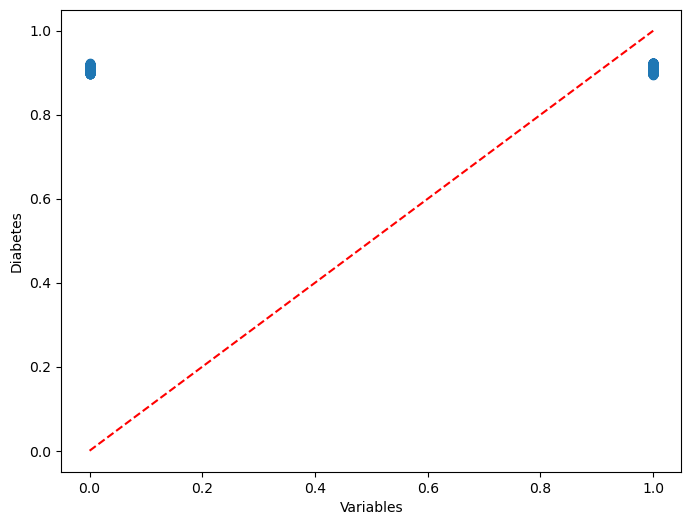

predicted Diabetes: [0.89619975]


C:\Users\Hp Elitebook\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
#Linear regression between variables and diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df[['Age','Height','Weight','Gender','BMI']]
y=df['Diabetes']
#train set and test set
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.5, random_state = 42)
#design regression model
model = LinearRegression()
model.fit(X_train, y_train)
#prediction model
y_pred = model.predict(X_test)
#Visualize the model
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red', linestyle ='--')
plt.xlabel('Variables')
plt.ylabel('Diabetes')
plt.show()
#Predicting the survival
predicted_diabetes = np.array([[64,150,84,0,34]])
predicted_diabetes = model.predict(new_survivor)
print('predicted Diabetes:', predicted_diabetes)

In [44]:
#MODEL EVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Evaluate_model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mean squared error:', mse)
print('root mean squared error:', rmse)
print('mean absolute error:', mae)
print('r-squared:', r2)

#model interpretation
coefficients = model.coef_
intercept = model.intercept_
print('coefficients:', coefficients)
print('intercept:', intercept)

mean squared error: 0.08176336490725308
root mean squared error: 0.2859429399500066
mean absolute error: 0.16389324085673304
r-squared: 6.615597196590883e-05
coefficients: [-0.00023723  0.00028266 -0.00018909 -0.00094003  0.00044018]
intercept: 0.8699015397479777
